In [1]:
from ising import Trajectory, filter_trajectories
import numpy as np
from matplotlib import pyplot as plt

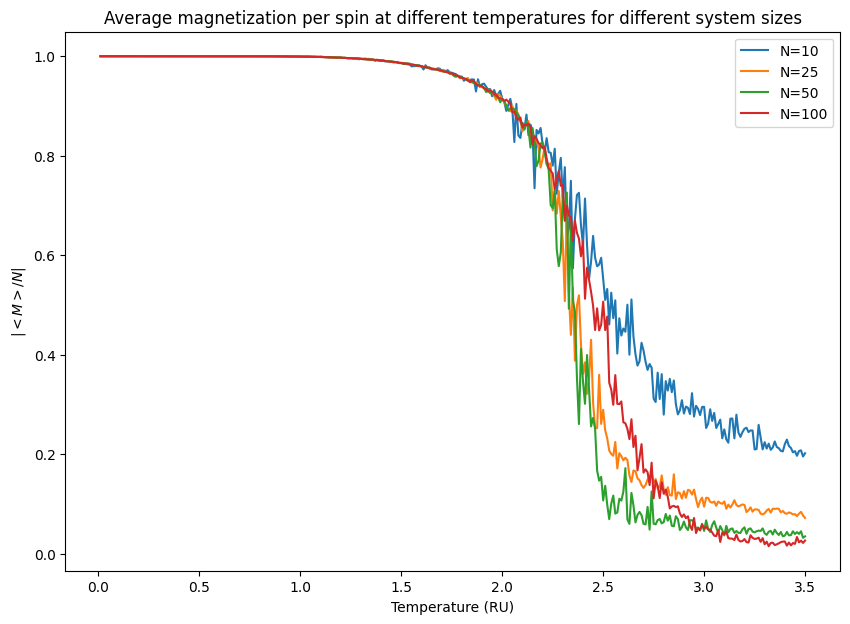

In [3]:
Ns = [10, 25, 50, 100]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

for N in Ns:

    filtered_trajectories = filter_trajectories(N=N, J=1, B=0, temperature=(0, 3.55), folder="ising_analysis_traj")

    temperatures = []
    magnetizations = []

    for name, params in filtered_trajectories.items():
        temperatures.append(params["temperature"])
        trajectory = Trajectory.from_file(name)
        magnetizations.append(trajectory.magnetization(r_equil=0.2, abs=True, n_blocks=1))

    indices = np.argsort(temperatures)

    ax.plot(np.array(temperatures)[indices], np.array(magnetizations)[indices], label=f"N={N}")

ax.set_title("Average magnetization per spin at different temperatures for different system sizes")
ax.set_xlabel("Temperature (RU)")
ax.set_ylabel("$|<M>/N|$")

ax.legend()

plt.show()